In [11]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')
import warnings

In [16]:
#             00    01    02           10    11    12
dataset={'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]} #dictionary key value pair

In [17]:
new_features=[5,7] 

In [18]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]]for i in dataset]

[[<matplotlib.collections.PathCollection at 0x1e3ad586df0>,

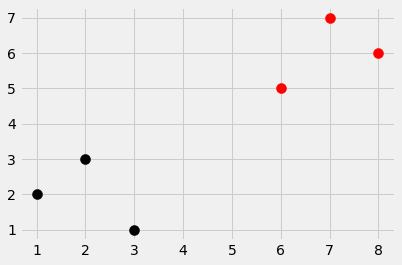

In [19]:
plt.show()

In [35]:
def k_nearest_neighbors(data,predict,k=3):
    if len(data)>=k :
        warnings.warn('K is set to a value less than total voting groups! ')
    distances=[]
    for group in data: #iterating through each point and calculating distance
        for features in data[group]:
            euclidean_distance=np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
                
    votes=[i[1] for i in sorted(distances)[:k]]
    print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result;
    

In [36]:
result=k_nearest_neighbors(dataset,new_features,k=3);
print(result);

[('r', 3)]
r


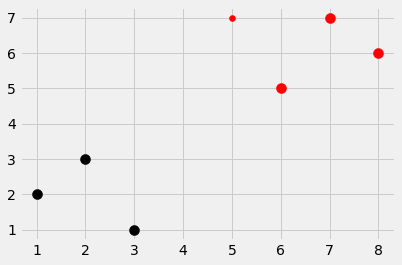

In [37]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]]for i in dataset]
plt.scatter(new_features[0],new_features[1],color=result)
plt.show()

In [ ]:
#AWESOME!!!!!!!!!!!!!!!!!!!

In [38]:
import pandas as pd
import random

In [39]:
df=pd.read_csv('bcw.csv')

In [41]:
df.replace('?',-99999,inplace=True)

In [42]:
df.drop(['id'],1,inplace=True)

In [43]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [44]:
full_data=df.astype(float).values.tolist()

In [45]:
random.shuffle(full_data)

In [48]:
print(full_data[:5])

[[3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 7.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [10.0, 6.0, 6.0, 3.0, 4.0, 5.0, 3.0, 6.0, 1.0, 4.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]


In [52]:
#
test_size=0.2
train_set={2:[],4:[]}
test_set={2:[],4:[]}
train_data= full_data[:-int(test_size*len(full_data))]#Everything upto the last 20% of the data
test_data=full_data[-int(test_size*len(full_data)):]#The last20% of the data

#Populating the dictionaries
for i in train_data:#identify the class as 2 or 4 (from the last column) and append till last column into the train_set.
    train_set[i[-1]].append(i[:-1])
for i in test_data:#same for test data and test set
    test_set[i[-1]].append(i[:-1])
    
correct=0
total=0

#Now we need to pass our data through KNN algo.
for group in test_set:# 2 and 4 are the groups in test set.
    for data in test_set[group]:
        vote=k_nearest_neighbors(train_set,data,k=5)
        if group == vote: 
            correct+=1
        total+=1

# so the train set and the test set each has 2 items, the first item is the list 
# of all cases with class 2 (benign tumor), the second item is the list of all cases
# with class 4 (malignant tumors). we go through all items of train_data, each items i 
# is a list, and the last elment of the list (i[-1]) contains the information of the class 
# of the tumor. 
# For example, the first item in train_data belongs to class 2,
# he writes train_set[i[-1]] = something (we will come back to explain what is something)
# to locate which of the two items 2 and 4 shall be appended, then he appends that
# list with all the features of that tumor (which is the something I mentioned)

[(2, 5)]
[(2, 3)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 3)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 3)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(4, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 4)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 4)]
[(4, 5)]
[(4, 4)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 4)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[

In [53]:
print(correct/total)

0.9928057553956835


In [ ]:
#99% , that's a very good outcome!